# 1: Basic stuff. More about bash than git sadly


## Non Git

* mkdir "New_directory_name_in_current_location"
* cd "directory_path"
* rm -rf "directory_path" remove folder from that 
* rm filepath Remove file from currect directory
* echo hello > file1.txt (write hello to file1.txt) (if world>>file1.txt, means append world to the text of file1.txt)
* mv file2.txt main.js (rename file2.txt to main.js)
## Git
* git init (initialize a git repository in current directory)

To add new files to a git repository we must past firs from a "staging area", i.e., intermediary stage. We then can stage or unstage our work in the staging area,
and finally if it's correct we can commit the new changes to the repository branch we are working in.

Branches are kidn of distinct versions of the repository. There is also a master or main branch, which is the "stable brach",i.e., working one. We generally **pull** the folders from one instance of the master branch and then modify (**add** +**commit**command) it in some way, then we can either **merge** those changes to the master branch, or to some other branch which is a derivation of the master branch.

Each commit and its associated -n "message" indiqueates in the history the time and cronological order in which it was committed.

**IMPORTANT**: Index=Staging Area

**IMPORTANT**: The staging area is basically a way to leave multiple versions registers of chuncks of code, so insted of commiting a huge amount of code at once, we might as well commit parts of it each time. 

**IMPORTANT**: Git will not automatically track new files. For that, you MUST **add** them. 
* git status : See the status of the git repository files (or -s, for short message)
* git add file1.txt (or other file). We can use multiple files via separation with space of files. Or commands like git *.txt for all files with .txt format, or git . (add all files in the repository)
  
**IMPORTANT**: If you change any of the files, you must do git add file_name.extension_of_file again before commiting to save the changes. This includes the case
of dealiting an already commited file before. If you do not add the file path after dealiting it, it will not be added those changes in the staging area, and hence
when commiting the staging area stuff it will not be included the fact that the file is no longer included!!!

We can thing of this in this way. You hace a certain final repository commited with 5 files. And say for saving working space you delete one of them from the folder you are working in. Then you do some changes, add them to the satging area and then commiting these stages. Now, in the final repository the deleted file still exists, since you did not add the file after commiting it, and hence the delation of the file does not affect the final repository !!!!
* git commit -m "first commit" (or git commit without -m, but then anyway you must write a message...)
* git rm file1.txt *.txt (this basically removes file both from the staging area and from the final repository in 1 step. This does basically the explanation above in just one go! )
* git ls-files (files in the staging area)
To rename/moving files (from file2.txt to main.js): This basically must be done in two steps:
1. git add file2.txt (the renamed file before being renamed, since it is the same as it non existing, so add it to the staging area)
2. git add main.js (add the file with the new name to be in staging area)
You can do this changes in 1 GO (as with git rm) with the next command.
* git mv main.js

log files: Basically files that are generated as consquence of the code but not meant to be shared with others. To prvent this, we must create
a file called .gitignore, and then include in it the distinct folder/files we want git to ignore, this will make them not appear in the status anymore!
We then need to add .gitignore to the staging area and then commiting it!, You can search in google for recommended .gitignore files to remove from the proyect (mainly in github).


diff tools: Allow us to see and compare the distinct changes that were made in each commit in the files. Well, generally IDE's have something already installed for this stuff, so...To do a quick comparison in vscode between comits and current working directory do just this:
* git difftool (--stage add this if you want to see the comparison between working directory vs index/staging area)


* git log (See history of commits)



# 2 More civilized git explanation. Uses github clone and other stuff.

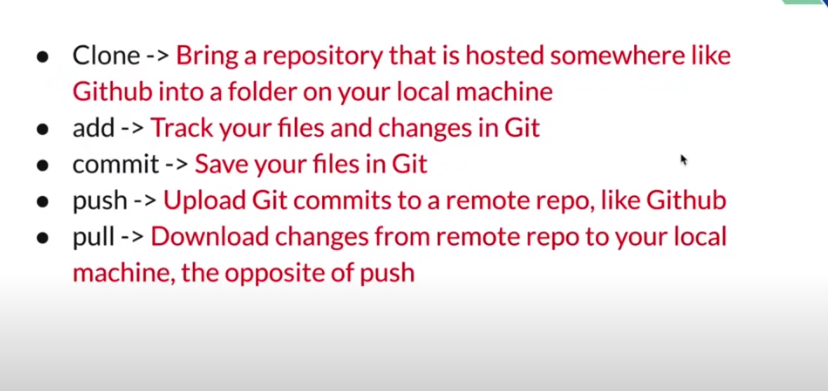

## SSH Keys Managment

SSH key: Basically used to be able to do Pull/Push/Clone requests on certain GitHub repositories.

To create a new SSH key just do:

Just write on command line git:
ssh-keygen -t ed25519 (type of encryption) -b 4096 -C "vdragosflorin@gmail.com" (github email address) 
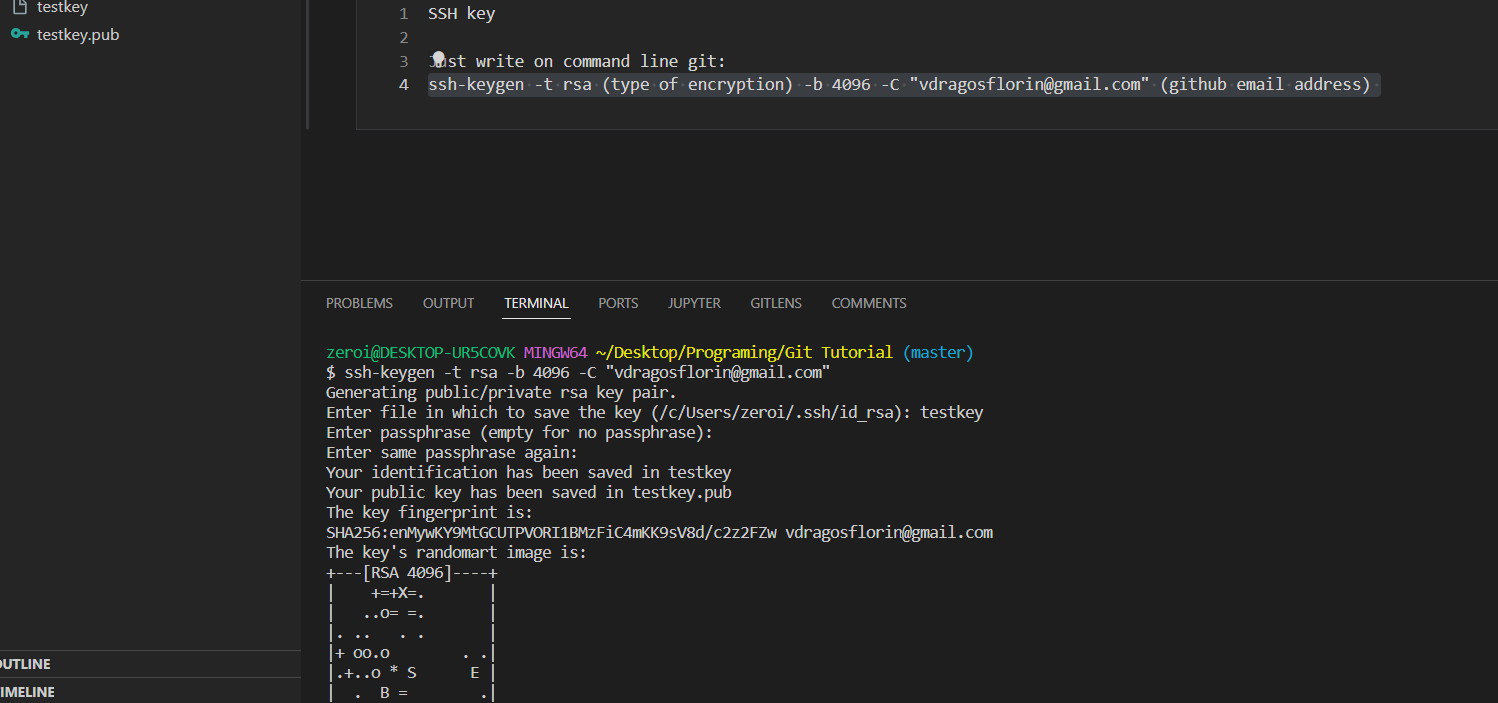 
- It is recomendable to store all keys in a single folder, in distinct files.
- passhphrase: Basically some sort of password associated to the private key
- The KeyFinger print is a SHA256 line that is associated to the private key. But it is not quite the private key.
- Now, the testkey.pub is the public key you must insert in github. People can see it. You don't share testkey (private key).

Then you write: cat testkey.pub and copy the content via highlightling it to copy the testkey.pub content!

You go then to github settings, ssh keys, add new ssh key, you give whatever title you want (associated to the key), and you copy the public key there. This is a summary of the options consequences. In general, with autentification key you can pull/push requests:

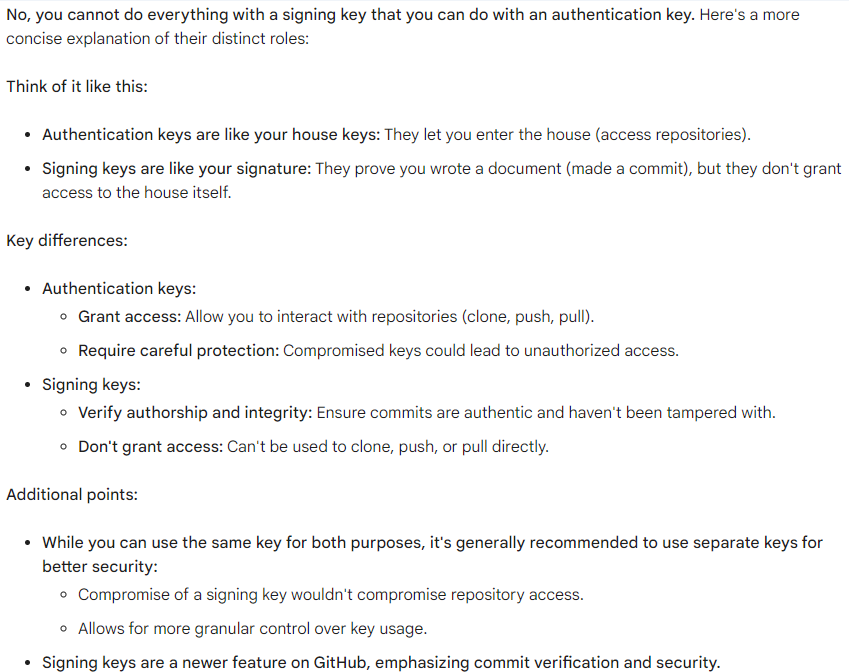

Now, lets set key to ssh agent. This ssh agent is basically used for storing private keys in the current terminal session, such that you do not need to directly intercat with private keys. Note that you must load the keys each time in the ssh-agent in each sesion, for which you must write the passphrase defined when creating the key.

First, activate the ssh-agent in current termianl (bash):

`eval "$(ssh-agent -s)"`

Second, load particular keys to the ssh-agent from where you got them stored:

`ssh-add -k (your_key_file_txt_path)` (not public key) + then write the correct passhprase associated

Now, you can see/delete all keys stored via

`ssh-add -l`
`ssh-add -D`


The idea of colaboration: Basically, if you want to colaborate to a repo, you must share your public key to the owner of the repo,
and then he has to give that public key access to pull or/and push from the said repo. You then access that repo via your ssh-agent stored private key. 

Basically, SSH are just a way to confirm your access to repos (either your own, insted of having to write username/password, or others's).


## Clone,origin,push,pull,etc..

The first step you have to do is clone a repo. You can do it either by cloning the URL or via ssh

`git clone URL` or `git clone SHH`. In general is recomendable to enter that repository via `cd name_of_repository"`


Now, the above Markdown about typical use case of git is pretty decent (tracking new files, etc...). Here I will add just some more interactivity between git and github!

Now, even if we commit the changes in our current repository, this will not change the LIVE repository. To change it, we must do:

`git push origin main`, origin: Location of our local git repository from which we cloned the stuff (basically, LIVE repository), main: the branch we want to push the changes to. Since we set up our ssh-agent this will automatically push the changes to the remote repository!.

Now, this will not work IF WE DO NOT CLONE a repository from github and we create it locally without clone. Since it does not know what the origin means at all!

Now, to solve this: We go to github, create a empty repository with same name as mine (or with just a file like .gitignore, or whatever), and the we do:

`git remote add origin SSH_link_to_repository`

You can check the conection of the new origin via: `git remote -v`

Now, you can do `git push origin master`. If you do not want to write  `origin master` always at the end, you can set that
branch and origin as the default of push via writting `git push -u origin master`. This default might vary depending on the branch you are in, so for each branch you must specify what -u branch exactly!


### Git Branching:

`git branch` see branches

`git checkout -b feature1` create a new branch named feature1. Git checkout basically switch between branches (if you do not add -b) 


Note: If you commit to one branch and not another, if you change between branches, the files in your documents will change as well, so be a ware of that!

If you want to add new branches to github you must do: `git push -u origin new_branch_name`, and if you do this from the new branched created locally, `feature1`, the content of feature1 will be stored in the new_branch_name on the github origin repository set before.

Now, if we want to merge this new branch (say feature1) and the master branch in github, we must do a pull request. A pull request is basically a request to merge both branches together, like, merge all into the master branch. The pull request will be visible in github, and people might ask you to change some stuff or not, etc.

You can create the pull request either via code, or in GitHub (via GitHub is way better btw). If it is accepted and the stuff can be merged in the master branch, then it will do, and if it is correctly merge, in principle you can deleate the feature1 branch now! (`git branch -d feature1`).

Now, even if you were to merge sucesfully the branches via the pull request, locally, this changes will not appear as true on our master branch!. To make the live repository and our local repository coincide we must pull all the changes in when we are on our master branch!

We just connect to our master branch locally, and the `git pull origin master` or `git pull` if we got it set already.

Now, say we have many changes in our master branch on the LIVE server and the feature branch we are working on now locally is very different from the live master branch. A good practice will be to: Change to master branch locally, `git pull origin master` to pull the master branch changes in our local master branch, and finally change to our feautre1 branch and do `git merge master`, to keep updated the feature branch!

### Git Undoing

1. `git reset <optional:filename>` This basically takes out of the "add" intermediary step all files or some files.
2. `git reset HEAD~1` Note: HEAD to git is a pointer to the LAST commit. Basically is used when we want to do something to the last commit.Then the ~1 basically indicates that we want it to go back 1 commit.
3. `git reset <log commit id obtain from git log>` This basically reset eveything to the particular commit id we input there. The changes will be unstaged, not completly removed. To completly remove changes you must do `git reset --hard <id of commit>`, this is a "complete back in time"!

### Forking on GITHUB

Basically, when forking we copy all the repository to a new repository own by me, and there you can change whatever!
 
Now, if we want to sort of merge my changes to the repostiory I forked from I must do: 
1. Change something and save the changes to some existing branch, say `dev`, or a new branch of the forked reposityory.
2. Go to create a pull request on github.
3. Base Repository: The repository i want to merge my forked changes into, Base: The branch I want to merge
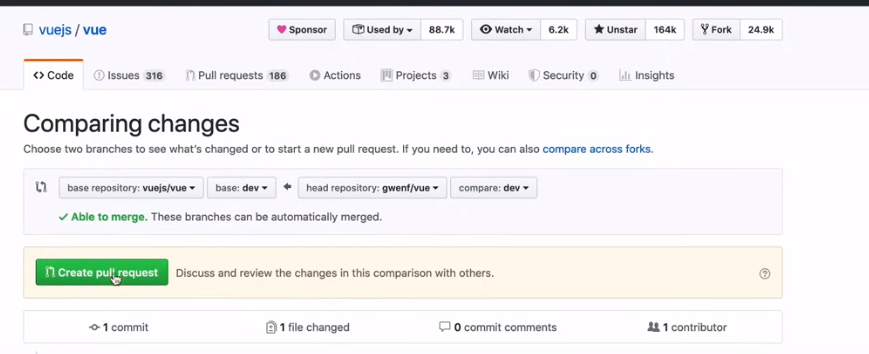